# '''Simulations for Figure S20a and S20c'''

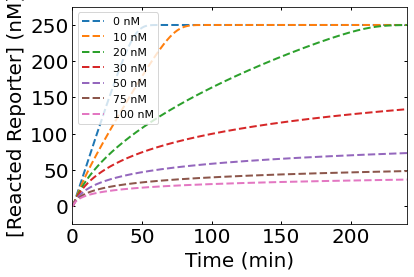

In [1]:
# Import packages
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

# Function for the comparator based on Eqns S6, S7, S8
def Comparator(y, t, k_txn, k_th, k_sd, Ref_dART, IFN_dART, Reporter0):
    Ref_RNA, IFN_RNA, Reporter_reacted = y
    dRef_RNAdt = k_txn*Ref_dART - k_th*Ref_RNA*IFN_RNA - k_sd*Ref_RNA*Reporter0 + k_sd*Ref_RNA*Reporter_reacted
    dIFN_RNAdt = k_txn*IFN_dART - k_th*Ref_RNA*IFN_RNA
    dReporter_reacteddt = k_sd*Ref_RNA*Reporter0 - k_sd*Ref_RNA*Reporter_reacted
    return [dRef_RNAdt, dIFN_RNAdt, dReporter_reacteddt]


# Initial conditions
Ref_RNA0 = 0 # Initial Ref-O1-RNA concentration
IFN_RNA0 = 0 # Initial IFN-O1'-RNA concentration
Reporter_reacted0 = 0.0 # Initial Reacted reporter concentration
y0 = [Ref_RNA0, IFN_RNA0, Reporter_reacted0]
k_txn = 0.004 * 60 # Fitted transcription rate constant
k_th = 1e6/1e9 * 60 # RNA:RNA hybridization rate constant
k_sd = 1e5/1e9 * 60 # Strand displacement rate constant based on 6 bp toehold
Reporter0 = 250 # Initial Reporter concentration
Ref_dART = 25 # Initial Ref-O1-dART concentration

IFN_dART_list = [0, 10, 20, 30, 50, 75, 100] # List of varying IFN-O1'-dART concentration

# Time interval of the reaction between 0 and 240 minutes.
t = np.linspace(0, 240, 1000)

# Calculate reacted reporter kinetics based on each concentration of IFN-O1'-dART
for IFN_dART in IFN_dART_list:
    React_rep = odeint(Comparator, y0, t, args=(k_txn, k_th, k_sd, Ref_dART, IFN_dART, Reporter0))
    # extract Reporter_reacted concentration for each concentration of IFN-O1'-dART
    Reporter_reacted = React_rep[:, 2]
    # plot the kinetics
    lw = 2
    plt.plot(t, Reporter_reacted, linestyle = '--',  label = '0 nM', linewidth=lw)


fs = 20

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylim(-25,275)
plt.xlim(0,240)
ax1 = plt.gca()
ax1.xaxis.set_tick_params(which='both',size=3,width=1,direction='in',top='on')
ax1.yaxis.set_tick_params(which='both',size=3,width=1,direction='in',right='on')
plt.xlabel('Time (min)',fontsize=fs)
plt.ylabel('[Reacted Reporter] (nM)',fontsize=fs)
plt.legend(["0 nM", "10 nM", "20 nM", "30 nM", "50 nM", "75 nM", "100 nM"], loc='upper left', fontsize=11)

# plt.savefig('Figure S20a.svg')




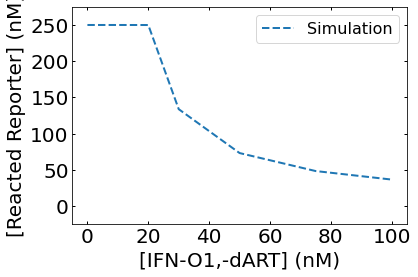

In [3]:
'''Plotting dose-response curve of varying IFN-O1'-dART concentrations'''

# create an empty list to store the simulated Reporter_reacted values for each unbound_dART concentration
sim_Reporter_reacted_list = []

# Simulation for the Comparator for varying unbound IFN-O1'-dART concentrations
for IFN_dART in IFN_dART_list:
    React_rep = odeint(Comparator, y0, t, args=(k_txn, k_th, k_sd, Ref_dART, IFN_dART, Reporter0))
    # extract Reporter_reacted concentrations from the solution
    Reporter_reacted = React_rep[:, 2]
    # endpoint value
    sim_Reporter_reacted_list.append(Reporter_reacted[-1])
    
# plot the dose-response curve    
plt.plot(IFN_dART_list, sim_Reporter_reacted_list, linestyle = '--',  label = 'Simulation', linewidth=lw)


plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylim(-25,275)
ax1 = plt.gca()
ax1.xaxis.set_tick_params(which='both',size=3,width=1,direction='in',top='on')
ax1.yaxis.set_tick_params(which='both',size=3,width=1,direction='in',right='on')
plt.xlabel('[IFN-O1,-dART] (nM)',fontsize=fs)
plt.ylabel('[Reacted Reporter] (nM)',fontsize=fs)
plt.legend(fontsize=fs-4)

# plt.savefig('Figure S20c.svg')

